In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
# knn
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
#Decision Tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
# Support Vector Machine
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
# Random Forest
from sklearn.ensemble import RandomForestClassifier
# Adaptive Boosting
from sklearn.ensemble import AdaBoostClassifier

In [4]:
filename = "Population estimates by gender nationality and region 2010 - 2022_data.csv"

df = pd.read_csv(filename)
df["Year"] = df["Year"].str.replace(",", '')
df["Population estimates"] = df["Population estimates"].str.replace(",", '')
df["Year"]=df["Year"].astype(int)
df["Population estimates"]=df["Population estimates"].astype(int)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 676 entries, 0 to 675
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Region                676 non-null    object
 1   Year                  676 non-null    int32 
 2   Gender                676 non-null    object
 3   Nationality           676 non-null    object
 4   Population estimates  676 non-null    int32 
dtypes: int32(2), object(3)
memory usage: 21.2+ KB
None


In [5]:
print(df.head())

           Region  Year  Gender Nationality  Population estimates
0         Madinah  2014  Female       Saudi                562344
1          Tabouk  2010  Female       Saudi                239792
2            Hail  2013  Female       Saudi                211727
3  Eastern Region  2016    Male       Saudi               1308467
4         Al-Baha  2018  Female   Non-Saudi                 16951


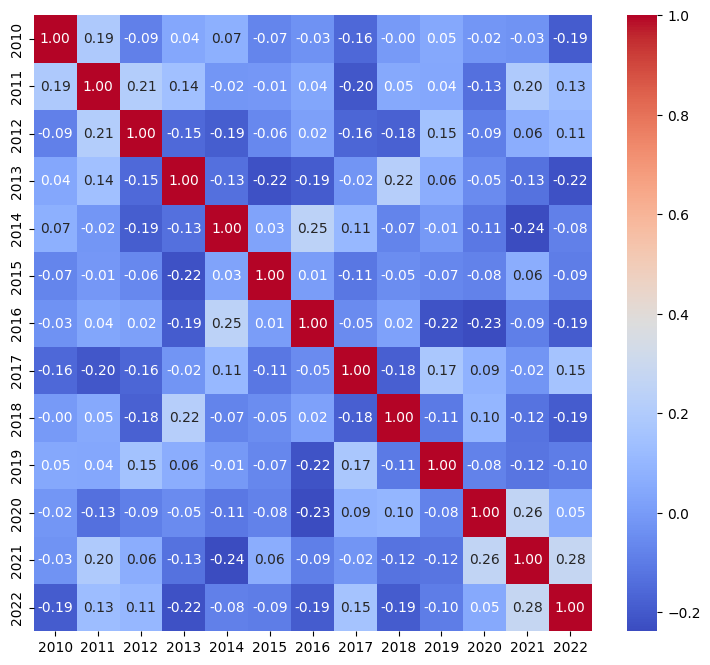

In [9]:
data = []
features = df["Year"].unique()
features.sort()
for year in features:
    data.append(df.loc[df["Year"] == year, "Population estimates"])
data = np.array(data).transpose()
df2 = pd.DataFrame(data=data, columns=features)
corr = df2.corr()
fig, ax = plt.subplots(figsize=(9,8))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

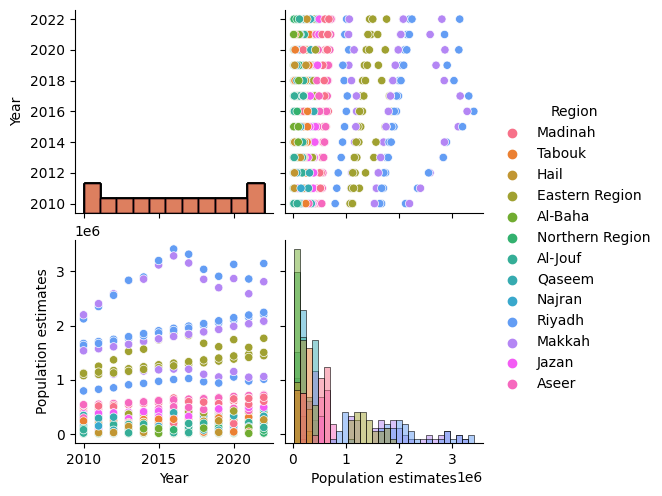

In [7]:
sns.pairplot(df[["Year", "Population estimates", "Region"]], hue="Region", diag_kind="hist")
plt.show()

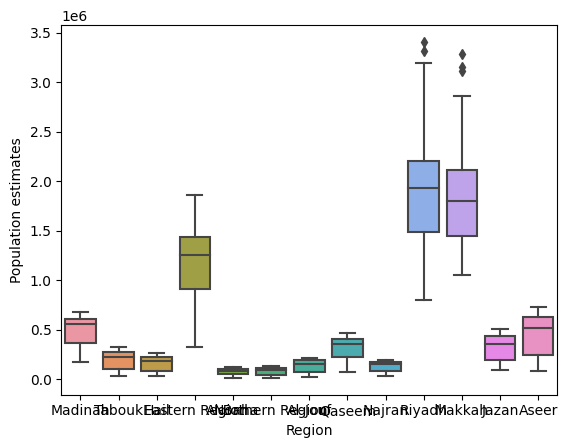

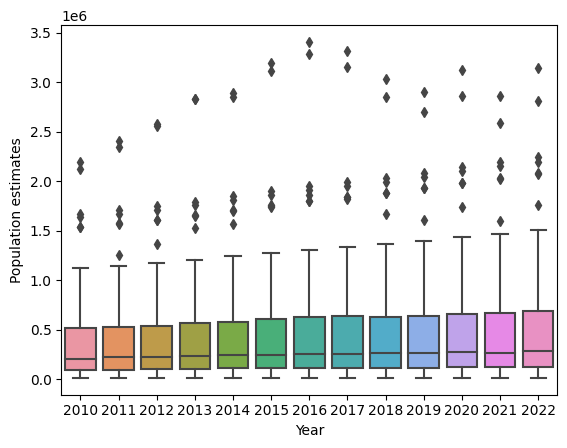

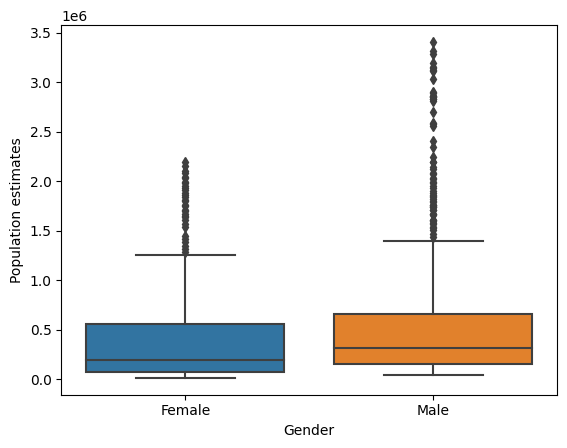

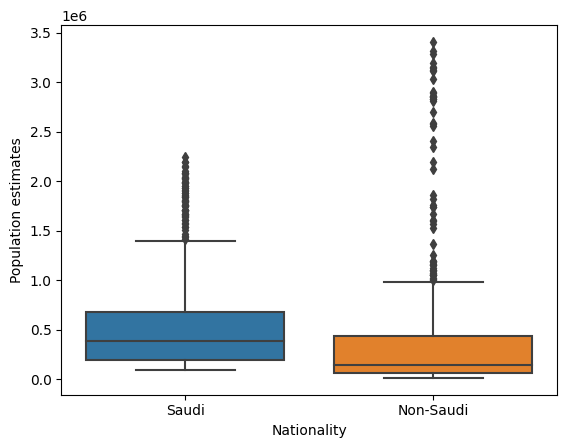

In [8]:
for i in range(len(df.keys())-1):
    figure = plt.figure()
    ax2 = sns.boxplot(x=df.keys()[i], y='Population estimates', data=df)
plt.show()

In [24]:
df["Region"] = LabelEncoder().fit_transform(df["Region"])
df["Nationality"] = LabelEncoder().fit_transform(df["Nationality"])
accuracies = []

In [25]:
x = df.drop(['Gender'], axis = 1)
y = df["Gender"]
y = LabelEncoder().fit_transform(df["Gender"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
scaler = StandardScaler()
scaler.fit(x_train)
scaled_X_train = scaler.transform(x_train) 
scaled_X_test = scaler.transform(x_test) 
error_rate = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))
k = error_rate.index(min(error_rate)) + 1
knn = KNeighborsClassifier(n_neighbors = k)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)
print("kNN:\n",confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
accuracies.append(("kNN", accuracy_score(y_test, pred)))

kNN:
 [[50 18]
 [51 17]]
              precision    recall  f1-score   support

           0       0.50      0.74      0.59        68
           1       0.49      0.25      0.33        68

    accuracy                           0.49       136
   macro avg       0.49      0.49      0.46       136
weighted avg       0.49      0.49      0.46       136



In [29]:
#Decision Tree
x = df.drop(['Gender'], axis = 1)
y = df["Gender"]
x = x.iloc[:30]
y = y.iloc[:30]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
model = DecisionTreeClassifier(criterion='gini')
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("Decision Tree:\n",classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracies.append(("Decision Tree", accuracy_score(y_test, y_pred)))

Decision Tree:
               precision    recall  f1-score   support

      Female       0.67      0.40      0.50         5
        Male       0.00      0.00      0.00         1

    accuracy                           0.33         6
   macro avg       0.33      0.20      0.25         6
weighted avg       0.56      0.33      0.42         6

[[2 3]
 [1 0]]


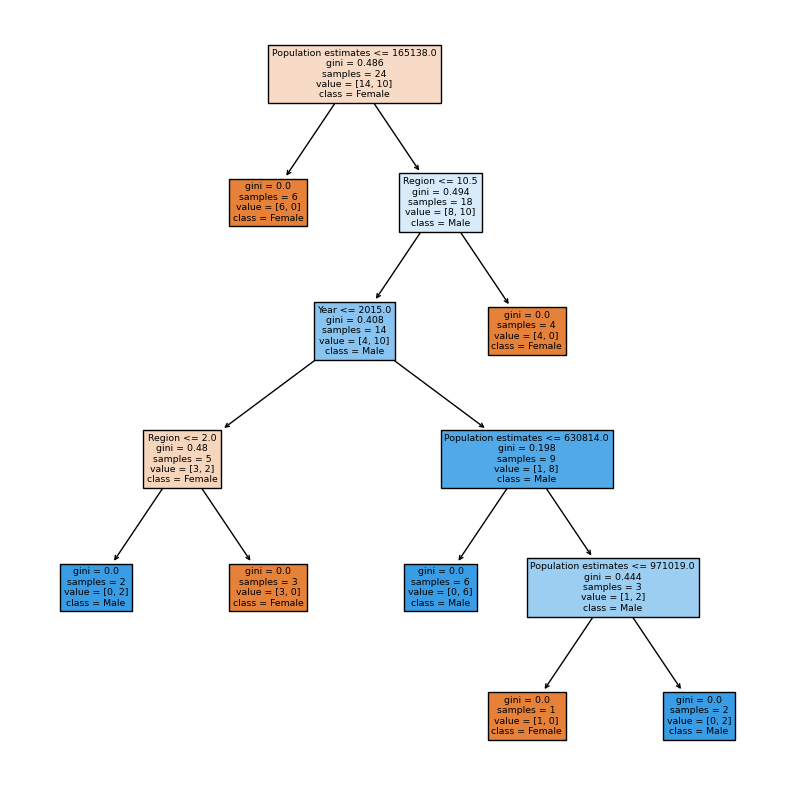

In [28]:
plt.figure(figsize = (10, 10))
plot_tree(model, feature_names = x.columns, 
    class_names = y.unique(), filled = True)
plt.show()

In [30]:
x = df.drop(['Gender'], axis = 1)
y = df["Gender"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)
scaler = StandardScaler()
scaler.fit(x_train)
scaled_X_train = scaler.transform(x_train) 
scaled_X_test = scaler.transform(x_test)
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma': [100, 10, 1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(scaled_X_train, y_train)
print("Best params of C and gamma:", grid.best_estimator_)
grid_predictions = grid.predict(scaled_X_test)
print("Support Vector Machine:\n", confusion_matrix(y_test, grid_predictions))
print(classification_report(y_test, grid_predictions))
accuracies.append(("Support Vector Machine", accuracy_score(y_test, grid_predictions)))

Best params of C and gamma: SVC(C=1000, gamma=1)
Support Vector Machine:
 [[64 38]
 [32 69]]
              precision    recall  f1-score   support

      Female       0.67      0.63      0.65       102
        Male       0.64      0.68      0.66       101

    accuracy                           0.66       203
   macro avg       0.66      0.66      0.65       203
weighted avg       0.66      0.66      0.65       203



In [32]:
x = df.drop(['Gender'], axis = 1)
y = df["Gender"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
rf_classifier = RandomForestClassifier()
rf_classifier.fit(x_train, y_train)
y_pred = rf_classifier.predict(x_test)
print("Random Forest:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracies.append(("Random Forest", accuracy_score(y_test, y_pred)))

Random Forest:
               precision    recall  f1-score   support

      Female       0.50      0.44      0.47        66
        Male       0.53      0.59      0.55        70

    accuracy                           0.51       136
   macro avg       0.51      0.51      0.51       136
weighted avg       0.51      0.51      0.51       136

[[29 37]
 [29 41]]


In [33]:
x = df.drop(['Gender'], axis = 1)
y = df["Gender"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
adaboost_classifier = AdaBoostClassifier()
adaboost_classifier.fit(x_train, y_train)
y_pred = adaboost_classifier.predict(x_test)
print("Adaptive Boosting:\n", classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
accuracies.append(("Adaptive Boosting", accuracy_score(y_test, y_pred)))

Adaptive Boosting:
               precision    recall  f1-score   support

      Female       0.64      0.60      0.62        68
        Male       0.62      0.66      0.64        68

    accuracy                           0.63       136
   macro avg       0.63      0.63      0.63       136
weighted avg       0.63      0.63      0.63       136

[[41 27]
 [23 45]]


In [35]:
accuracies = sorted(accuracies, key = lambda pair: pair[1], reverse = True)
print("Top classificator is", accuracies[0][0],"\nIt`s accuracy is:", accuracies[0][1])

Top classificator is Decision Tree 
It`s accuracy is: 0.6666666666666666
